# TP7 Redes neuronais

Rede feed-forward

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from keras_visualizer import visualizer
from keras import backend


In [2]:
df = pd.read_csv("../../ficheiros/Parte 2/Breastcancer.csv")

<Axes: xlabel='diagnosis'>

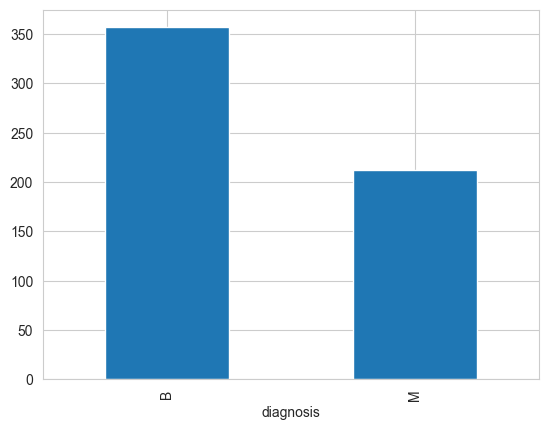

In [3]:
df = df.drop(["Unnamed: 32"], axis=1)

df.diagnosis.value_counts().plot.bar()

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

In [6]:
labelencode = LabelEncoder()
y = labelencode.fit_transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Pré-processamento

### Normalização

- Standadization ``StandardScaler()``
- Min-max ``MinMaxScaler()``

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

## Model 1

In [10]:
tf.random.set_seed(3)

* Keras is an API to tensorflow

    * Makes our life easier
    * Does not enable all TF funcionalities

## Preprocessing

* Reshape (input layer)
    * Remodelar os dados para se ajustarem ao formato da camada de entrada
    * Usar Flatten antes da Dense Layer:
        * Preparar os dados para as camadas densas da rede
        * Camadas densas requerem que os dados de entrada de uma forma achatada, pois não funcionam com as dimensões espaciais 2D inerentes aos mapas de atributos.  


In [11]:
model = keras.Sequential([
    tf.keras.Input(shape=(30,)),
    keras.layers.Dense(1, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

## Funções de ativação para output layer

### Classificação 

* Sigmoid: converte output em probabilidades em [0, 1]
    * Classificação binária  
* Softmax: converte todos os outputs (logits) em probabilidades que somam 1
    * Classificação k classes

### Regressão

* Não usar função de ativação

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            31 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
visualizer(model, file_format="png", view=True, settings=None)

In [15]:
# Training the Neural Network
history = model.fit(X_train, y_train, validation_split=0.1, epochs=30)

Epoch 1/30


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "C:\Users\paulor\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main

  File "C:\Users\paulor\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\paulor\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever

  File "C:\Users\paulor\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once

  File "C:\Users\paulor\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\ipykernel\kernelbase.py", line 542, in dispatch_queue

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\ipykernel\kernelbase.py", line 531, in process_one

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\ipykernel\ipkernel.py", line 359, in execute_request

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\ipykernel\kernelbase.py", line 775, in execute_request

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\ipykernel\ipkernel.py", line 446, in do_execute

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\paulor\AppData\Local\Temp\ipykernel_20732\1160160297.py", line 2, in <module>

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 314, in fit

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 117, in one_step_on_iterator

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 104, in one_step_on_data

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\keras\src\trainers\trainer.py", line 316, in compute_loss

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\keras\src\trainers\compile_utils.py", line 609, in __call__

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\keras\src\trainers\compile_utils.py", line 645, in call

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\keras\src\losses\loss.py", line 43, in __call__

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\keras\src\losses\losses.py", line 22, in call

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\keras\src\losses\losses.py", line 1722, in sparse_categorical_crossentropy

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\keras\src\ops\nn.py", line 1567, in sparse_categorical_crossentropy

  File "C:\Users\paulor\Desenvolvimento\Repositorios\Pessoais\ANADI_2024_0\.venv\lib\site-packages\keras\src\backend\tensorflow\nn.py", line 638, in sparse_categorical_crossentropy

Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_950]

In [ ]:
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
